Sentences:
['Do not pity the dead, Harry. Pity the living, and, above all those who live without love.', 'It is impossible to manufacture or imitate love', 'Differences of habit and language are nothing at all if our aims are identical and our hearts are open.', 'What do I care how he looks? I am good-looking enough for both of us, I theenk! All these scars show is zat my husband is brave!', 'Love as powerful as your mother’s for you leaves it’s own mark. To have been loved so deeply, even though the person who loved us is gone, will give us some protection forever.', 'Family…Whatever yeh say, blood’s important. . . .', 'I cared more for your happiness than your knowing the truth, more for your peace of mind than my plan, more for your life than the lives that might be lost if the plan failed.']

BERT inputs:
{'input_type_ids': <tf.Tensor: shape=(7, 128), dtype=int32, numpy=
array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

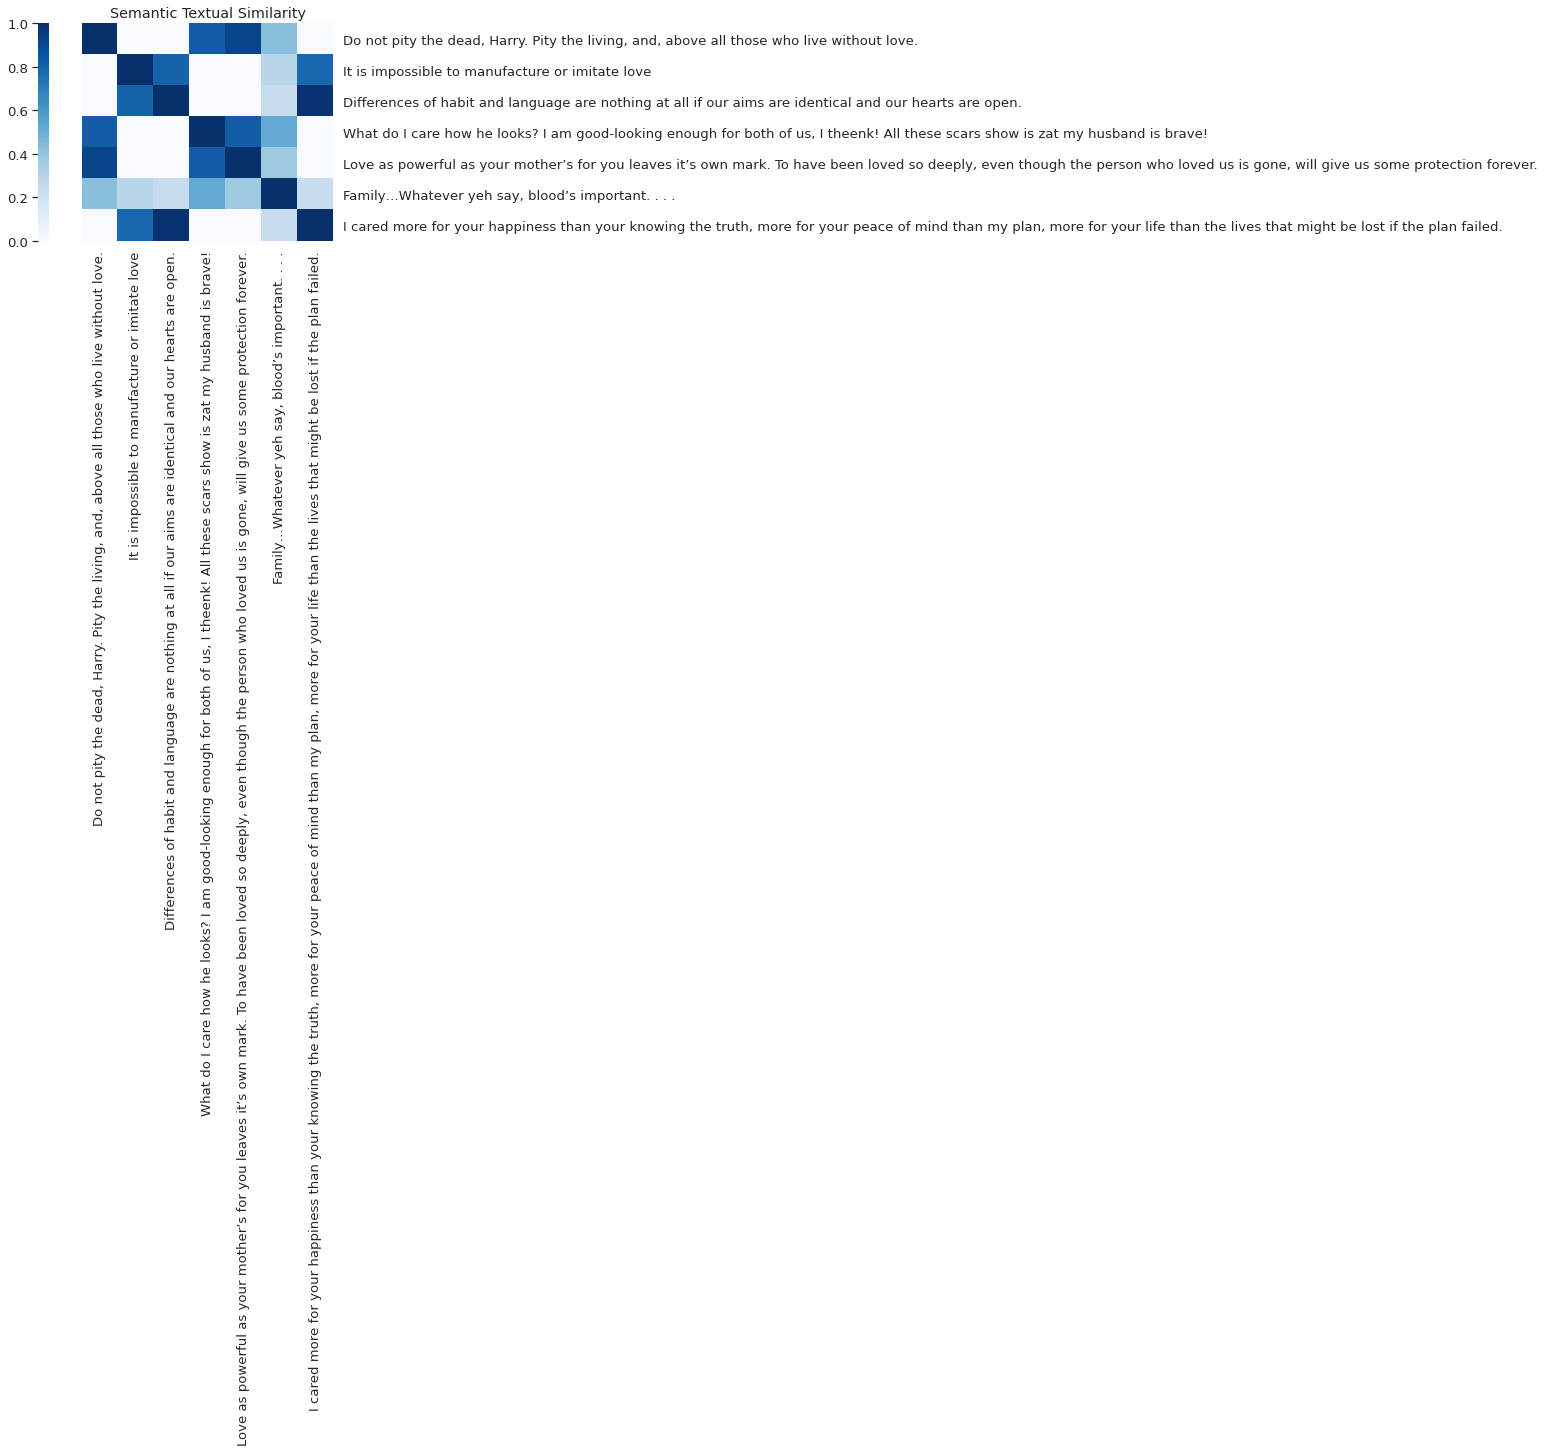

In [3]:
import seaborn as sns
from sklearn.metrics import pairwise

import tensorflow as tf
import tensorflow_hub as hub
import tensorflow_text as text  # Imports TF ops for preprocessing.

sentences = [
	"Do not pity the dead, Harry. Pity the living, and, above all those who live without love.",
	"It is impossible to manufacture or imitate love",
	"Differences of habit and language are nothing at all if our aims are identical and our hearts are open.",
	"What do I care how he looks? I am good-looking enough for both of us, I theenk! All these scars show is zat my husband is brave!",
	"Love as powerful as your mother’s for you leaves it’s own mark. To have been loved so deeply, even though the person who loved us is gone, will give us some protection forever.",
	"Family…Whatever yeh say, blood’s important. . . .",
	"I cared more for your happiness than your knowing the truth, more for your peace of mind than my plan, more for your life than the lives that might be lost if the plan failed."
]


#@title Configure the model { run: "auto" }
BERT_MODEL = "https://tfhub.dev/google/experts/bert/wiki_books/2" # @param {type: "string"} ["https://tfhub.dev/google/experts/bert/wiki_books/2", "https://tfhub.dev/google/experts/bert/wiki_books/mnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qnli/2", "https://tfhub.dev/google/experts/bert/wiki_books/qqp/2", "https://tfhub.dev/google/experts/bert/wiki_books/squad2/2", "https://tfhub.dev/google/experts/bert/wiki_books/sst2/2",  "https://tfhub.dev/google/experts/bert/pubmed/2", "https://tfhub.dev/google/experts/bert/pubmed/squad2/2"]
# Preprocessing must match the model, but all the above use the same.
PREPROCESS_MODEL = "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3"

preprocess = hub.load(PREPROCESS_MODEL)
bert = hub.load(BERT_MODEL)
inputs = preprocess(sentences)
outputs = bert(inputs)

print("Sentences:")
print(sentences)

print("\nBERT inputs:")
print(inputs)

print("\nPooled embeddings:")
print(outputs["pooled_output"])

print("\nPer token embeddings:")
print(outputs["sequence_output"])


def plot_similarity(features, labels):
  """Plot a similarity matrix of the embeddings."""
  cos_sim = pairwise.cosine_similarity(features)
  sns.set(font_scale=1.2)
  cbar_kws=dict(use_gridspec=False, location="left")
  g = sns.heatmap(
      cos_sim, xticklabels=labels, yticklabels=labels,
      vmin=0, vmax=1, cmap="Blues", cbar_kws=cbar_kws)
  g.tick_params(labelright=True, labelleft=False)
  g.set_yticklabels(labels, rotation=0)
  g.set_title("Semantic Textual Similarity")

plot_similarity(outputs["pooled_output"], sentences)